<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Duplicates Lab**


Estimated time needed: **30** minutes


## Introduction


Data wrangling is a critical step in preparing datasets for analysis, and handling duplicates plays a key role in ensuring data accuracy. In this lab, you will focus on identifying and removing duplicate entries from your dataset. 


## Objectives


In this lab, you will perform the following:


1. Identify duplicate rows in the dataset and analyze their characteristics.
2. Visualize the distribution of duplicates based on key attributes.
3. Remove duplicate values strategically based on specific criteria.
4. Outline the process of verifying and documenting duplicate removal.


## Hands on Lab


Install the needed library


In [1]:
!pip install pandas
!pip install matplotlib

Import pandas module


In [2]:
import pandas as pd


Import matplotlib


In [3]:
import matplotlib.pyplot as plt


## **Load the dataset into a dataframe**


<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


In [4]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

Load the data into a pandas dataframe:



Note: If you are working on a local Jupyter environment, you can use the URL directly in the pandas.read_csv() function as shown below:



In [13]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


## Identify and Analyze Duplicates


### Task 1: Identify Duplicate Rows
1. Count the number of duplicate rows in the dataset.
3. Display the first few duplicate rows to understand their structure.


In [5]:
## Write your code here
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)


Number of duplicate rows: 20


In [6]:
duplicate_rows = df[df.duplicated()]
duplicate_rows.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
65437,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65438,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
65439,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
65440,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
65441,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 2: Analyze Characteristics of Duplicates
1. Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
2. Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.
   


In [7]:
## Write your code here
subset_duplicates = df[df.duplicated(subset=['MainBranch', 'Employment', 'RemoteWork'])]
print("Number of duplicates based on subset:", len(subset_duplicates))
subset_duplicates.head()


Number of duplicates based on subset: 64896


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
14,15,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Professional development or self-paced l...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Coding sessions (live or record...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
15,16,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,Some college/university study without earning ...,Books / Physical media;On the job training;Oth...,Technical documentation;Books;Written Tutorial...,...,0.0,0.0,0.0,0.0,0.0,0.0,Appropriate in length,Neither easy nor difficult,NaN,5.0
16,17,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,Books / Physical media;Other online resources ...,Technical documentation;Written Tutorials;Stac...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN


In [20]:
df.columns[0:50]

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize',
       'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse',
       'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith',
       'EmbeddedWantToWorkWith', 'EmbeddedAdmired', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'ToolsTechAdmired',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith',
       'NEWCollabToolsAdmired', 'OpSysPersonal u

In [17]:
# Frequency counts for the subset columns in duplicates
print("MainBranch value counts:")
print(subset_duplicates['MainBranch'].value_counts())

print("\nEmployment value counts:")
print(subset_duplicates['Employment'].value_counts())

print("\nRemoteWork value counts:")
print(subset_duplicates['RemoteWork'].value_counts())


MainBranch value counts:
MainBranch
I am a developer by profession                                                           50042
I am not primarily a developer, but I write code sometimes as part of my work/studies     6392
I am learning to code                                                                     3774
I code primarily as a hobby                                                               3252
I used to be a developer by profession, but no longer am                                  1436
Name: count, dtype: int64

Employment value counts:
Employment
Employed, full-time                                                                                                                                                       39031
Independent contractor, freelancer, or self-employed                                                                                                                       4829
Student, full-time                                                        

### Task 3: Visualize Duplicates Distribution
1. Create visualizations to show the distribution of duplicates across different categories.
2. Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.


In [9]:
!pip install seaborn


/tmp/ipykernel_570/2971528012.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="tab10")


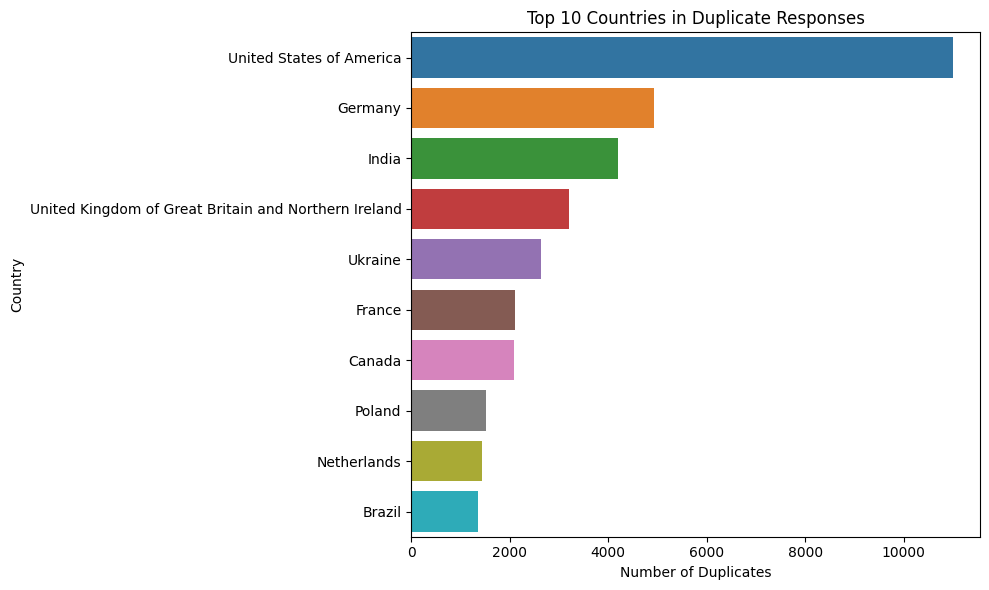

In [10]:
## Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 countries with most duplicates
top_countries = subset_duplicates['Country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette="tab10")
plt.title("Top 10 Countries in Duplicate Responses")
plt.xlabel("Number of Duplicates")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


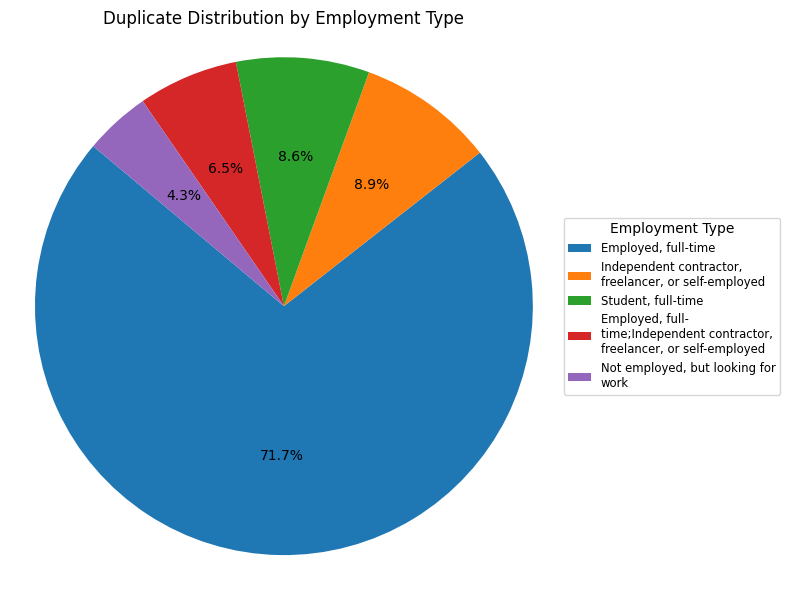

In [12]:
import matplotlib.pyplot as plt
import textwrap

# Top 5 Employment types in duplicate subset
top_employment = subset_duplicates['Employment'].value_counts().head(5)

# Wrap long labels to 30 characters
wrapped_labels = [textwrap.fill(label, 30) for label in top_employment.index]

# Plot the pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    top_employment.values,
    autopct='%1.1f%%',
    startangle=140
)

# Add legend with wrapped labels on the right
plt.legend(wedges, wrapped_labels, title="Employment Type",
           loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small')

plt.title("Duplicate Distribution by Employment Type")
plt.axis('equal')  # Equal aspect ratio ensures circle
plt.tight_layout()
plt.show()



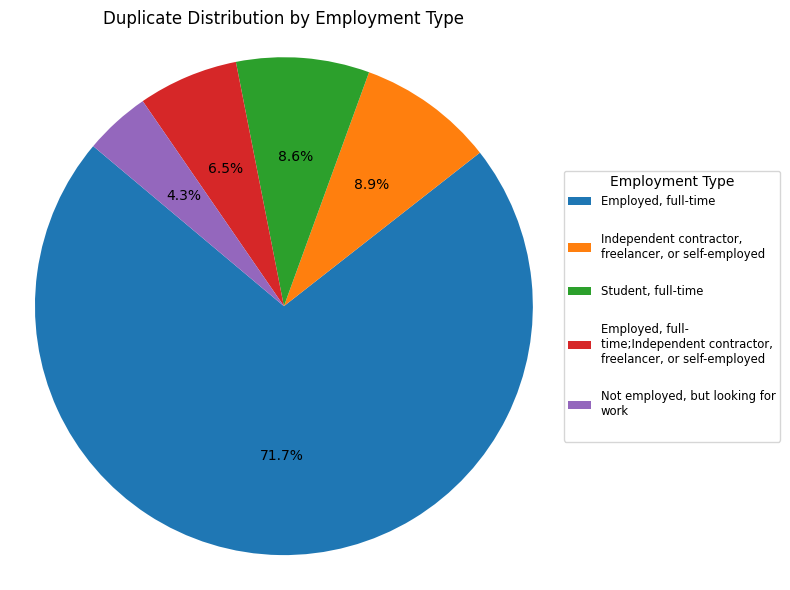

In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import textwrap

# Top 5 Employment types
top_employment = subset_duplicates['Employment'].value_counts().head(5)

# Wrap labels
wrapped_labels = [textwrap.fill(label, 30) for label in top_employment.index]

# Create pie chart
plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    top_employment.values,
    autopct='%1.1f%%',
    startangle=140
)

# Insert blank lines between entries using dummy handles
legend_handles = []
legend_labels = []
for wedge, label in zip(wedges, wrapped_labels):
    legend_handles.extend([wedge, mpatches.Patch(alpha=0)])  # transparent patch for space
    legend_labels.extend([label, ""])  # blank line

# Add spaced-out legend
plt.legend(legend_handles, legend_labels, title="Employment Type",
           loc="center left", bbox_to_anchor=(1, 0.5), fontsize='small')

plt.title("Duplicate Distribution by Employment Type")
plt.axis('equal')
plt.tight_layout()
plt.show()


### Task 4: Strategic Removal of Duplicates
1. Decide which columns are critical for defining uniqueness in the dataset.
2. Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.


In [16]:
## Write your code here
subset_cols = ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'EdLevel', 'Age', 'CodingActivities']

# Save original size
original_size = df.shape[0]

# Drop duplicates based on selected columns
df_cleaned = df.drop_duplicates(subset=subset_cols)

# Report the difference
print(f"Original dataset size: {original_size}")
print(f"After removing duplicates based on {subset_cols}: {df_cleaned.shape[0]} rows")
print(f"Rows removed: {original_size - df_cleaned.shape[0]}")


Original dataset size: 65457
After removing duplicates based on ['MainBranch', 'Employment', 'RemoteWork', 'Country', 'EdLevel', 'Age', 'CodingActivities']: 37332 rows
Rows removed: 28125


In [21]:
subset_cols = [
    'MainBranch', 'Employment', 'RemoteWork', 'EdLevel',
    'Age', 'CodingActivities', 'LearnCodeOnline',
    'YearsCodePro', 'DevType'
]

df_cleaned = df.drop_duplicates(subset=subset_cols)

print(f"Original rows: {len(df)}")
print(f"Cleaned rows: {len(df_cleaned)}")
print(f"Duplicates removed: {len(df) - len(df_cleaned)}")


Original rows: 65457
Cleaned rows: 60584
Duplicates removed: 4873


## Verify and Document Duplicate Removal Process


### Task 5: Documentation
1. Document the process of identifying and removing duplicates.


**Step 1: Identification of Duplicates**
I first used the `df.duplicated()` method to identify exact duplicate rows across the entire dataset. This gave an initial sense of how many records were fully duplicated. I also examined the structure of a few duplicates using `.head()` to better understand which fields were responsible for the redundancy.

**Step 2: Subset Analysis**
Since some rows may only differ in irrelevant columns (such as ResponseId or other open-text fields), the duplicate search was refined using a subset of columns. The following subset of categories were selected:['MainBranch', 'Employment', 'RemoteWork', 'EdLevel', 'Age', 
'CodingActivities', 'LearnCodeOnline', 'YearsCodePro', 'DevType'] This subset was chosen to reflect meaningful aspects of a respondent's professional background 
and coding experience that would reasonably define a unique response.

**Step 3: Strategic Removal**
I then used `df.drop_duplicates(subset=subset_cols)` to remove records that were duplicates within this subset. This allowed the elimination of records that were highly similar without losing important variation across other dimensions. Only 7% of rows (4,873 out of 65,457) were removed, which suggests the subset was well-balanced in that it removed redundancy while retaining data richness.

2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


**Rationale for Subset Selection**
The selected columns reflect key dimensions of a developer’s profile:
- 'MainBranch', 'Employment', and 'RemoteWork' capture the respondent’s current work situation.
- 'EdLevel' and 'Age' provide background context.
- 'CodingActivities', 'LearnCodeOnline', 'YearsCodePro', and 'DevType' describe skills and experience.
This subset omits identifiers like 'ResponseId' and less informative free-text fields to focus the removal process on truly redundant professional profiles.

### Summary and Next Steps
**In this lab, you focused on identifying and analyzing duplicate rows within the dataset.**

- You employed various techniques to explore the nature of duplicates and applied strategic methods for their removal.
- For additional analysis, consider investigating the impact of duplicates on specific analyses and how their removal affects the results.
- This version of the lab is more focused on duplicate analysis and handling, providing a structured approach to deal with duplicates in a dataset effectively.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11- 05|1.3|Madhusudhan Moole|Updated lab|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
